In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.artist import Artist

In [2]:
df = pd.read_csv("./SGRPmTOR_finalreckoning.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-1 uM Torin 1,75.622916,2.134292,79.950705,1.244014,NCYC 3264,DBVPG 6765,1 uM Torin 1,DBVPG 6765*1 uM Torin 1,0,0.109667,0.145667,0.179667,0.229667,0.302333,0.394333,0.508667,0.630000,0.766333,0.905333,1.035333,1.137333,1.167000,1.194667,1.216333,1.247000,1.270000,1.295667,1.322333,1.353000,1.381667,1.409667,1.431667,1.461667,1.479667,1.496000,1.520667,1.521333,1.550000,1.566333,1.579667,1.597000,1.607000,1.620667,1.630333,1.644333,1.644667,1.653667,1.673000,1.672333
3,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-2.5% DMSO,75.872172,2.820883,78.778806,3.535895,NCYC 3264,DBVPG 6765,2.5% DMSO,DBVPG 6765*2.5% DMSO,0,0.101333,0.135000,0.160667,0.205333,0.267000,0.350333,0.455000,0.577667,0.714667,0.857333,0.994000,1.113000,1.167333,1.194667,1.225333,1.246667,1.271333,1.301000,1.325667,1.354333,1.385333,1.415000,1.435333,1.463333,1.483333,1.502667,1.520667,1.525000,1.554000,1.576333,1.585667,1.602667,1.617667,1.629333,1.640000,1.655000,1.658667,1.666667,1.679333,1.685000
4,_lowTORIN_KGPUMBL_052817.xls,NCYC 3265-1 uM Torin 1,83.891908,3.952745,106.127244,26.093053,NCYC 3265,SK1,1 uM Torin 1,SK1*1 uM Torin 1,0,0.048333,0.063667,0.076667,0.093667,0.119000,0.150667,0.192000,0.237000,0.298000,0.371333,0.439667,0.504333,0.558333,0.593333,0.618667,0.638333,0.654000,0.669000,0.687000,0.708333,0.729000,0.748667,0.764000,0.785000,0.801667,0.815333,0.840000,0.847667,0.871000,0.884333,0.900667,0.915333,0.930333,0.948333,0.960000,0.977000,0.980667,0.993333,1.015667,1.020000


In [5]:
df.columns

Index(['experiment', 'Line-Treatment', 'DT inflection', 'StDev_inf',
       'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment',
       'Strain*Treatment', 'Time_0', 'Time_0.5', 'Time_1', 'Time_1.5',
       'Time_2', 'Time_2.5', 'Time_3', 'Time_3.5', 'Time_4', 'Time_4.5',
       'Time_5', 'Time_5.5', 'Time_6', 'Time_6.5', 'Time_7', 'Time_7.5',
       'Time_8', 'Time_8.5', 'Time_9', 'Time_9.5', 'Time_10', 'Time_10.5',
       'Time_11', 'Time_11.5', 'Time_12', 'Time_12.5', 'Time_13', 'Time_13.5',
       'Time_14', 'Time_14.5', 'Time_15', 'Time_15.5', 'Time_16', 'Time_16.5',
       'Time_17', 'Time_17.5', 'Time_18', 'Time_18.5', 'Time_19', 'Time_19.5',
       'Time_20'],
      dtype='object')

### Identifying **Experiments**, **Treatments** and **Lab Strains**

In [6]:
experiments = list(df.experiment.unique())
treatments = list(df.Treatment.unique())
strains = list(df['Lab strain'].unique())

In [7]:
print("Number of Experiments: ", len(experiments))
experiments

Number of Experiments:  59


['_lowTORIN_KGPUMBL_052817.xls',
 'original data.xls SET 4 HIGH RAPA',
 'RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls',
 'SCREEN_SET2_HIGHTORIN#3_MGK_09302017_F.xls',
 'SET1GDC_ARMBL_080217.xls',
 'SET2_caffeine_KGPU_080517.xls',
 'SET2AZDredo+highTORINMBL_07302017.xls',
 'SET3_Low Rapa_REDO_MGK_081117.xls',
 'SET4_highTORIN_REDO_NBMBL_080717.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET1_GDC_redo_JE_092617.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET1_highgdc-0941_AR_053117.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET1_highTORIN_KGPUMBL_052817.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG_092317.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET2_HIGH_TORIN_AR_10092017_F.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTorin_Repeat_JEMBL_073',
 'SGRP_mTOR_inhibitsSCREEN_SET2_highTORIN_JEMBL_081717.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET3_round3_lowTORIN_KG_091517_F.xls',
 'SGRP_mTORinhibits_SET1_CAFF_REDO_NBMBL_08032017.xls',
 'SGRP_mTORinhibits_SET1_lowTORINredo_JEMBL_08032017.xls',
 'SGRP_mTORinhibits_SET2_Caffeine_J

In [8]:
print("Types of Treatments: ", len(treatments))
treatments

Types of Treatments:  10


['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [9]:
print("Number of Strains: ", len(strains))
strains

Number of Strains:  90


['BY4743',
 'NCYC 3264',
 'NCYC 3265',
 'NCYC 3266',
 'NCYC 3284',
 'NCYC 3290',
 'NCYC 3311',
 'NCYC 3312',
 'NCYC 3313',
 'NCYC 3314',
 'NCYC 3315',
 'NCYC 3318',
 'NCYC 3319',
 'NCYC 3445',
 'NCYC 3447',
 'NCYC 3448',
 'NCYC 3449',
 'NCYC 3451',
 'NCYC 3452',
 'NCYC 3453',
 'NCYC 3454',
 'NCYC 3455',
 'NCYC 3456',
 'NCYC 3457',
 'yML 683',
 'yML 684',
 'yML 685',
 'yML 686',
 'yML 687',
 'yML 688',
 'yML 689',
 'yML 690',
 'yML 691',
 'yML 692',
 'yML 693',
 'yML 694',
 'yML 695',
 'yML 696',
 'yML 697',
 'yML 698',
 'yML 699',
 'yML 707',
 'yML 708',
 'NCYC 3467',
 'yML 559',
 'yML 569',
 'yML 669',
 'yML 677',
 'yML 681',
 'NCYC 3458',
 'NCYC 3460',
 'NCYC 3461',
 'NCYC 3462',
 'NCYC 3466',
 'NCYC 3468',
 'NCYC 3469',
 'NCYC 3470',
 'NCYC 3471',
 'NCYC 3472',
 'NCYC 3486',
 'NCYC 3487',
 'yML 557',
 'yML 558',
 'yML 560',
 'yML 561',
 'yML 562',
 'yML 563',
 'yML 564',
 'yML 565',
 'yML 566',
 'yML 567',
 'yML 568',
 'yML 570',
 'yML 618',
 'yML 665',
 'yML 666',
 'yML 667',
 'yML

### Filtering the dataset for BY4743 strain as the control group

In [10]:
df_Control = (df[df['Lab strain'] == 'BY4743']).reset_index(drop=True)

In [11]:
df_Control.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,original data.xls SET 4 HIGH RAPA,WT-vehicle,71.956550,1.083065,74.768422,2.232198,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,original data.xls SET 4 HIGH RAPA,WT-20 ng/ml RAPA,260.047128,11.569153,470.258578,21.283503,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
4,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1 uM Torin 1,72.520115,5.558710,87.728696,1.069446,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.031000,0.033000,0.036667,0.044333,0.043667,0.073333,0.096333,0.129333,0.178667,0.222000,0.290667,0.366000,0.458000,0.557333,0.654000,0.754000,0.845333,0.919667,0.955333,0.963000,0.965000,0.972333,0.976000,0.982667,0.989667,0.997667,1.006667,1.016333,1.023667,1.033333,1.043667,1.054333,1.065000,1.076000,1.088667,1.096333,1.106333,1.117667,1.127667,1.136000


In [12]:
df_Control.shape

(141, 51)

In [13]:
(df_Control[(df_Control['Treatment'] == treatments[0]) & (df_Control['Line-Treatment'] == 'WT-1 uM Torin 1')]).reset_index(drop=True)

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,SGRP_mTOR_inhibitsSCREEN_SET3_round3_lowTORIN_...,WT-1 uM Torin 1,77.470182,1.317928,79.853622,0.573648,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.035667,0.038667,0.041000,0.047000,0.055667,0.069667,0.089667,0.114000,0.147667,0.193000,0.250000,0.324667,0.414667,0.522000,0.640000,0.766000,0.890667,1.010667,1.118000,1.198333,1.227333,1.233000,1.240000,1.249333,1.259333,1.271000,1.283667,1.298333,1.313000,1.328000,1.342333,1.359333,1.374667,1.391000,1.405667,1.421667,1.434333,1.448000,1.460667,1.473333
2,SGRP_mTORinhibits_SET1_lowTORINredo_JEMBL_0803...,WT-1 uM Torin 1,80.033888,1.893505,83.670776,1.682435,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.026667,0.030000,0.031333,0.036000,0.041333,0.050667,0.063333,0.080000,0.103333,0.133333,0.173000,0.223333,0.286667,0.364667,0.456333,0.563667,0.675333,0.785667,0.893667,0.983000,1.046000,1.056333,1.061333,1.067000,1.075667,1.085333,1.095667,1.107000,1.118000,1.128667,1.140333,1.152333,1.163667,1.176333,1.187000,1.197333,1.207000,1.222333,1.233667,1.243000
3,SGRP_mTORinhibitsSCREEN_SET1_LOW_TORIN_MGK_081...,WT-1 uM Torin 1,80.745658,1.753291,85.522578,1.253374,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.037667,0.040667,0.048333,0.059333,0.073333,0.094667,0.122667,0.157333,0.203000,0.261333,0.331333,0.418667,0.520333,0.632667,0.744333,0.855000,0.957000,1.034667,1.072000,1.074667,1.080667,1.088333,1.095667,1.107000,1.116333,1.127000,1.134667,1.148333,1.157333,1.167333,1.178667,1.191000,1.204333,1.213000,1.225667,1.237000,1.245667,1.255667,1.267000,1.278667
4,SGRP_mTORinhibitsSCREEN_SET2_LOWTORIN_ARMBL_09...,WT-1 uM Torin 1,87.734964,0.908211,90.019056,0.050776,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.031333,0.032667,0.032333,0.031667,0.030667,0.031333,0.032667,0.035333,0.038000,0.039667,0.040333,0.041333,0.042000,0.044333,0.047667,0.053333,0.060000,0.068333,0.080333,0.094667,0.116667,0.143667,0.180000,0.226000,0.284333,0.357667,0.447667,0.547667,0.657333,0.744000,0.783000,0.801000,0.813000,0.830667,0.854000,0.879000,0.908000,0.938333,0.967667,1.000667
5,SGRP_mTORinhibitsSCREEN_SET2_lowTORIN_JEMBL_10...,WT-1 uM Torin 1,79.015773,3.084402,82.819621,0.890764,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.030667,0.035000,0.041333,0.051333,0.067667,0.084000,0.111000,0.144000,0.187667,0.243333,0.312333,0.393000,0.494333,0.604667,0.721333,0.831667,0.939000,1.026333,1.076333,1.084667,1.086333,1.090333,1.101333,1.108667,1.119000,1.128333,1.140333,1.150667,1.159333,1.170333,1.181333,1.190333,1.199667,1.212667,1.223333,1.233000,1.242000,1.254333,1.264333,1.273667
6,SGRP_mTORinhibitsSCREEN_SET3_LOWTORIN_MGK_0911...,WT-1 uM Torin 1,22.443031,9.343027,44.979378,43.739400,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.045667,0.045000,0.037000,0.031333,0.019667,0.015333,0.057667,0.104000,0.180000,0.153000,0.376000,0.404000,0.623000,0.749000,0.875667,0.994667,1.115000,1.197667,1.208667,1.231333,1.246667,1.285667,1.316333,1.354000,1.390000,1.426000,1.454000,1.481667,1.503667,1.542333,1.546667,1.573333,1.587333,1.606333,1.6

###  Analysis of the relationship between **Treatment** and **Doubling Time** on a particular experiment for the Control group

Get the unique treatments on the Lab strain for the different experiments.

In [14]:
t_c_df = df_Control.drop_duplicates(subset='Treatment').reset_index(drop=True)
t_c_df.drop(['experiment', 'Line-Treatment', 'StDev_int', 'DT interval', 'Lab strain', 'Strain*Treatment'], axis=1, inplace=True)
t_c_df

,DT inflection,StDev_inf,Strain,Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,88.642690,1.594672,BY4743,1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,84.383101,4.532748,BY4743,2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,71.956550,1.083065,BY4743,1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,260.047128,11.569153,BY4743,20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
4,64.013175,2.594965,BY4743,2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
5,69.927220,1.537758,BY4743,6.67% H2O,0,0.044667,0.047667,0.056000,0.068667,0.076333,0.118333,0.157000,0.211333,0.278000,0.362333,0.463000,0.571333,0.682667,0.787667,0.871667,0.924333,0.940667,0.938667,0.946333,0.958000,0.965333,0.973000,0.981333,0.987000,0.996000,1.007000,1.017333,1.029667,1.040667,1.051333,1.065333,1.079000,1.090333,1.106000,1.117333,1.134333,1.145667,1.157333,1.168333,1.181667
6,108.240802,6.526496,BY4743,25 uM Torin 1,0,0.037333,0.039333,0.040000,0.040000,0.042000,0.043000,0.044667,0.046333,0.047000,0.048333,0.050000,0.051667,0.053333,0.055333,0.057667,0.060333,0.063333,0.066000,0.070667,0.074667,0.078667,0.084667,0.092000,0.100000,0.110000,0.122000,0.136667,0.156333,0.183333,0.215667,0.256667,0.309333,0.374333,0.449000,0.537333,0.636333,0.737667,0.844000,0.942000,1.026667
7,65.557543,3.033790,BY4743,100 uM GDC0941,0,0.032000,0.039000,0.050333,0.065000,0.088333,0.124667,0.175333,0.232000,0.318667,0.425000,0.545333,0.683333,0.831667,0.985667,1.087333,1.099667,1.121000,1.140333,1.162667,1.196000,1.225000,1.256000,1.288333,1.319667,1.354000,1.381667,1.411000,1.437667,1.461333,1.488333,1.507333,1.529333,1.546667,1.564333,1.581000,1.596333,1.611333,1.624333,1.636333,1.646000
8,90.524319,4.569443,BY4743,1 mg/mL Caffeine,0,0.041000,0.040333,0.042000,0.044333,0.049667,0.055000,0.062000,0.070000,0.080333,0.095333,0.113333,0.135000,0.163000,0.199000,0.245333,0.308333,0.384000,0.477333,0.586667,0.703000,0.820667,0.928333,1.022000,1.099667,1.159667,1.201000,1.223667,1.235667,1.245000,1.254667,1.261333,1.270000,1.278667,1.285333,1.293667,1.303000,1.310667,1.317333

In [199]:
one = (t_c_df.iloc[0]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
two = (t_c_df.iloc[1]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
three = (t_c_df.iloc[2]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
four = (t_c_df.iloc[3]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
five = (t_c_df.iloc[4]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
six = (t_c_df.iloc[5]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
seven = (t_c_df.iloc[6]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
eight = (t_c_df.iloc[7]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
nine = (t_c_df.iloc[8]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])
ten = (t_c_df.iloc[9]).drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])

In [164]:
d = t_c_df.drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'], axis=1)
d_plot = list()
for i in range(10):
    d_plot.append([j + (t_c_df['DT inflection'].iloc[i]) for j in d.iloc[i]])

In [165]:
d_plot

[[88.64268986,
  88.725023193,
  88.74435652700001,
  88.75868986,
  88.78102319300001,
  88.815023193,
  88.85868986,
  88.91568986,
  88.98368986,
  89.06368986000001,
  89.15835652700001,
  89.261023193,
  89.378023193,
  89.48568986000001,
  89.58435652700001,
  89.665356527,
  89.70902319300001,
  89.716023193,
  89.71968986,
  89.72968986000001,
  89.73902319300001,
  89.746023193,
  89.75402319300001,
  89.759023193,
  89.77668986,
  89.78335652700001,
  89.78868986,
  89.80735652700001,
  89.80202319300001,
  89.826356527,
  89.83068986,
  89.84302319300001,
  89.85168986000001,
  89.86035652700001,
  89.86968986000001,
  89.877356527,
  89.89035652700001,
  89.89168986,
  89.901356527,
  89.92035652700001,
  89.92268986],
 [84.38310148,
  84.45910147999999,
  84.47176814699999,
  84.48310147999999,
  84.50110147999999,
  84.52610148,
  84.56410147999999,
  84.61076814699999,
  84.66910148,
  84.74610148,
  84.83010148,
  84.93410148,
  85.050434813,
  85.16310148,
  85.2714348

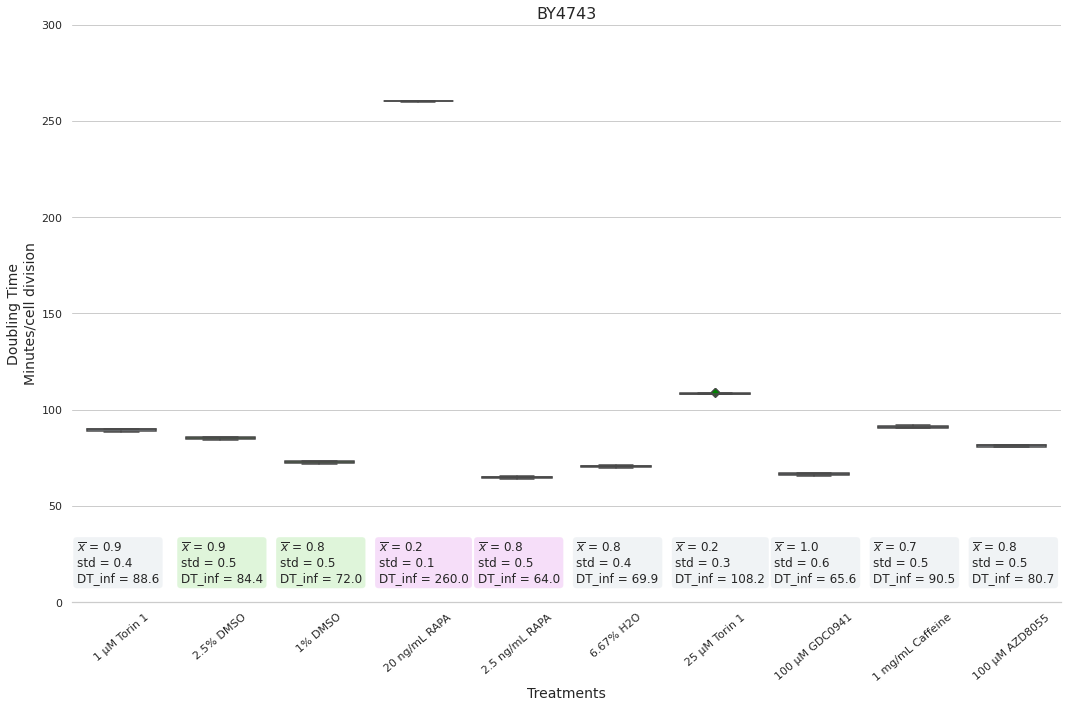

In [198]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(15,10))

flier = dict(markerfacecolor='green', marker='D')
# mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

g = sns.boxplot(data=d_plot, #pd.concat([one, two, three, four, five, six, seven, eight, nine, ten], axis=1), 
                width=.7, 
                flierprops=flier)
                # showmeans=True,
                # meanprops=mean_shape)

xvalues = ["1 µM Torin 1", "2.5% DMSO", "1% DMSO", "20 ng/mL RAPA", "2.5 ng/mL RAPA", "6.67% H2O", "25 µM Torin 1", "100 µM GDC0941", "1 mg/mL Caffeine", "100 µM AZD8055"]
plt.xticks(np.arange(10), xvalues, rotation=40)
plt.ylim(0,300)

# setting title
plt.title("BY4743", fontsize=16)
# x and y labels
plt.xlabel("Treatments", fontsize=14)
plt.ylabel("Doubling Time\nMinutes/cell division", fontsize=14)

# set colors for the box plots
palette = ['#B7C3D0', '#60d147', '#60d147', "#d35de3", "#d35de3", '#B7C3D0', '#B7C3D0', '#B7C3D0', '#B7C3D0', '#B7C3D0']
color_dict = dict(zip(xvalues, palette))
for i in range(0,10):
    mybox = g.patches[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

# Mini text showing mean and standard deviation
locs = [-0.45, 0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]

for j in range(10):
    mean = round((t_c_df.iloc[j].drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])).mean(), 1)
    std = round((t_c_df.iloc[j].drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])).std(), 1)
    dt_inf = round(t_c_df['DT inflection'][j], 1)
    textstr = "$\overline {x}$" + f" = {mean} \nstd = {std} \nDT_inf = {dt_inf}"
    props = dict(boxstyle='round', facecolor=palette[j], alpha=.2)
    g.text(locs[j], 10.7, textstr, fontsize=12, bbox=props)

#remove spines
sns.despine(top=True, right=True, left=True, bottom=False)

plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


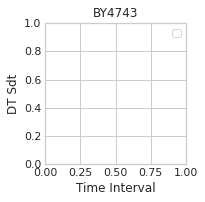

In [35]:
D = np.zeros(42)

one2 = (t_c_df.iloc[0]).drop(['StDev_inf', 'Strain', 'Treatment'])
two2 = (t_c_df.iloc[1]).drop(['StDev_inf', 'Strain', 'Treatment'])
three2 = (t_c_df.iloc[2]).drop(['StDev_inf', 'Strain', 'Treatment'])

std_dt = t_c_df['StDev_inf']
dt = t_c_df['DT inflection']

d1, d2, d3 = D, D, D
for i in range(len(D)):
    if i > 0:
        d1[i] = d1[i-1] + std_dt[0]
        d2[i] = d2[i-1] + std_dt[1]
        d1[i] = d1[i-1] + std_dt[2]

# plt.boxplot(one2, dt[0], label=treatments[0])
# plt.plot(two, d2, label=treatments[1])
# plt.plot(three, d3, label=treatments[2])

plt.title(strains[0])
plt.xlabel("Time Interval")
plt.ylabel("DT Sdt")

plt.legend()

        
# print("d1: ", d1)
# print("d2: ", d2)
# print("d3: ", d3)

/home/yeabsira/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


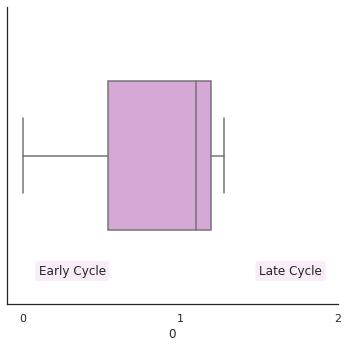

In [17]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(one, color="plum", width=.5)

# despine: removing border
sns.despine()

# add full range of value to the x-axis
plt.xlim([-0.1,2])
plt.xticks(np.arange(0,3,1))

# Early Cycle and Late Cycle
props = dict(boxstyle='round', facecolor='plum', alpha=0.2)
ax.text(0.1, 0.4, "Early Cycle", fontsize=12, bbox=props)
ax.text(1.5, 0.4, "Late Cycle", fontsize=12, bbox=props)

plt.tight_layout()

plt.show()

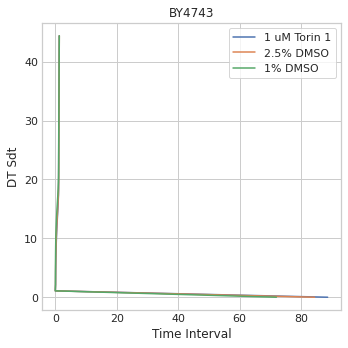

In [36]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(one2, d1, label=treatments[0])
ax.plot(two2, d2, label=treatments[1])
ax.plot(three2, d3, label=treatments[2])

ax.set_title(strains[0])
ax.set_xlabel("Time Interval")
ax.set_ylabel("DT Sdt")

plt.tight_layout()

ax.legend()

plt.show()

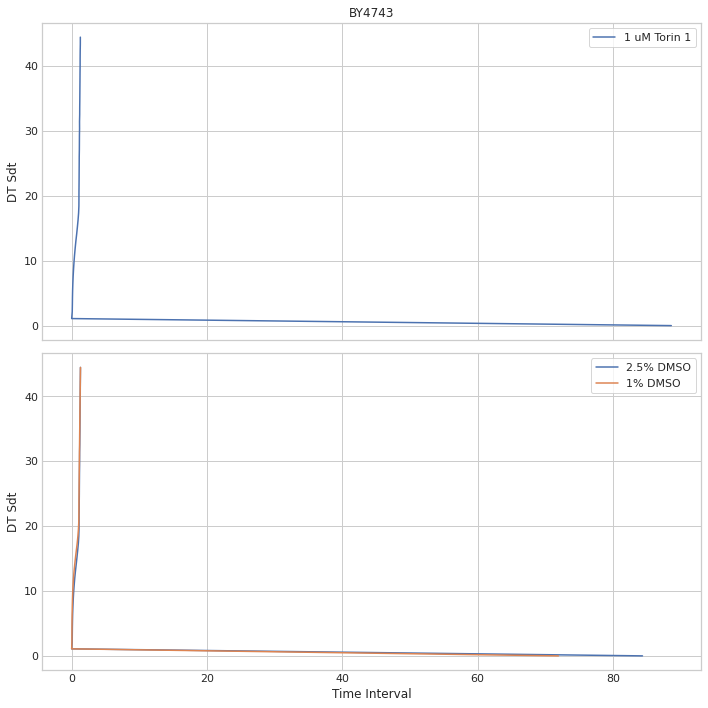

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)


ax1.plot(one, d1, label=treatments[0])
ax2.plot(two, d2, label=treatments[1])
ax2.plot(three, d3, label=treatments[2])

ax1.set_title(strains[0])
ax1.set_ylabel("DT Sdt")

ax2.set_xlabel("Time Interval")
ax2.set_ylabel("DT Sdt")

plt.tight_layout()

ax1.legend()
ax2.legend()

plt.show()

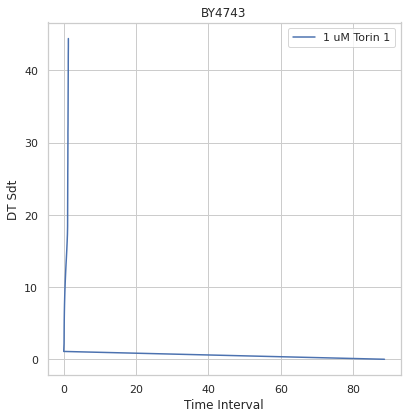

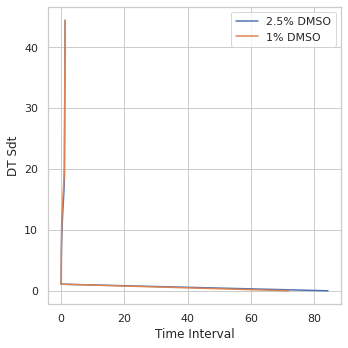

In [132]:
fig1, ax1 = plt.subplots(figsize=(5,5))
fig2, ax2 = plt.subplots(figsize=(5,5))

ax1.plot(one, d1, label=treatments[0])
ax2.plot(two, d2, label=treatments[1])
ax2.plot(three, d3, label=treatments[2])

ax1.set_title(strains[0])
ax1.set_ylabel("DT Sdt")
ax1.set_xlabel("Time Interval")

ax2.set_xlabel("Time Interval")
ax2.set_ylabel("DT Sdt")

plt.tight_layout()

ax1.legend()
ax2.legend()
# to save figure
# fig1.savefig('fig1.png')
# fig2.savefig('fig2.png')
plt.show()

<AxesSubplot:>

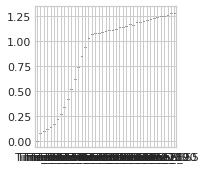

In [39]:
ad = t_c_df[t_c_df.Treatment == '1 uM Torin 1']
ad.boxplot(column=['Time_0', 'Time_0.5', 'Time_1', 'Time_1.5', 'Time_2', 'Time_2.5', 'Time_3', 'Time_3.5', 'Time_4', 'Time_4.5', 'Time_5','Time_5.5', 'Time_6', 'Time_6.5', 'Time_7', 'Time_7.5', 'Time_8', 'Time_8.5', 'Time_9', 'Time_9.5', 'Time_10', 'Time_10.5', 'Time_11', 'Time_11.5', 'Time_12', 'Time_12.5', 'Time_13', 'Time_13.5', 'Time_14', 'Time_14.5', 'Time_15', 'Time_15.5', 'Time_16', 'Time_16.5', 'Time_17', 'Time_17.5', 'Time_18', 'Time_18.5', 'Time_19', 'Time_19.5', 'Time_20'])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U6')) -> None

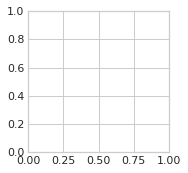

In [40]:
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = t_c_df.iloc[1]
# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

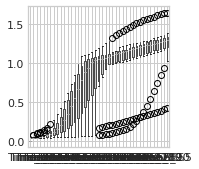

In [24]:
bp = t_c_df.boxplot(column=['Time_0', 'Time_0.5', 'Time_1', 'Time_1.5', 'Time_2', 'Time_2.5', 'Time_3', 'Time_3.5', 'Time_4', 'Time_4.5', 'Time_5','Time_5.5', 'Time_6', 'Time_6.5', 'Time_7', 'Time_7.5', 'Time_8', 'Time_8.5', 'Time_9', 'Time_9.5', 'Time_10', 'Time_10.5', 'Time_11', 'Time_11.5', 'Time_12', 'Time_12.5', 'Time_13', 'Time_13.5', 'Time_14', 'Time_14.5', 'Time_15', 'Time_15.5', 'Time_16', 'Time_16.5', 'Time_17', 'Time_17.5', 'Time_18', 'Time_18.5', 'Time_19', 'Time_19.5', 'Time_20'])

<AxesSubplot:>

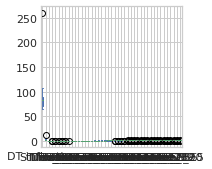

In [25]:
t_c_df.plot(kind='box')

<AxesSubplot:>

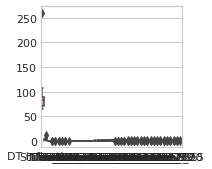

In [26]:
sns.boxplot(data=t_c_df,)

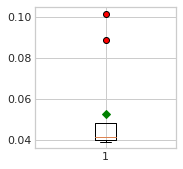

In [27]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=t_c_df['Time_1'],
            flierprops=red_circle,
            showmeans=True,
            meanprops=mean_shape)
plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

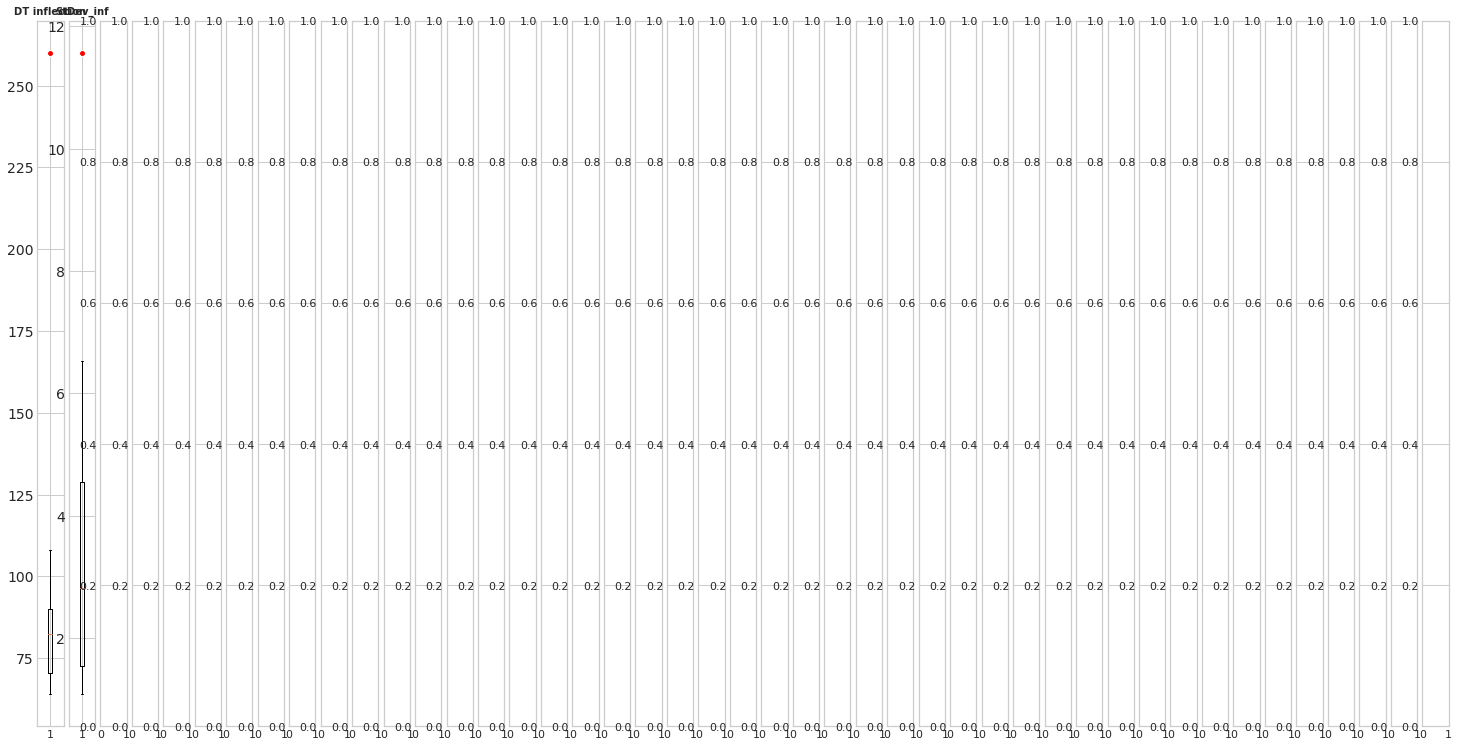

In [41]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(t_c_df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(t_c_df.iloc[:,i], flierprops=red_circle)
    ax.set_title(t_c_df.columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
# plt.tight_layout()
plt.show()